# Heat Equation

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
X = 5
T = 10000  # Total time=2.78 hr

dx = 0.01
dt = 0.1
alpha = 0.0001  # Thermal diffusivity
factor = alpha * dt / dx**2

# Initialize temperature array
nx = int((X/dx)+1)
nt = int((T/dt)+1)

X, Y = np.meshgrid(np.arange(-2.5,2.5+dx, dx), np.arange(0, T+dt, dt))

u = np.zeros(X.shape,np.float64)
u[:,0] = 100
u[:,-1] = 100

# Main loop for solving heat equation
for i in range(1,nt):
    for j in range(1, nx - 1):
        u[i,j] = u[i-1,j] + factor * (u[i-1,j-1] - 2*u[i-1,j] + u[i-1,j+1])

In [73]:
dx = 0.01
dt = 0.1
alpha = 0.01  # Thermal diffusivity
factor = alpha * dt / dx**2

factor

10.0

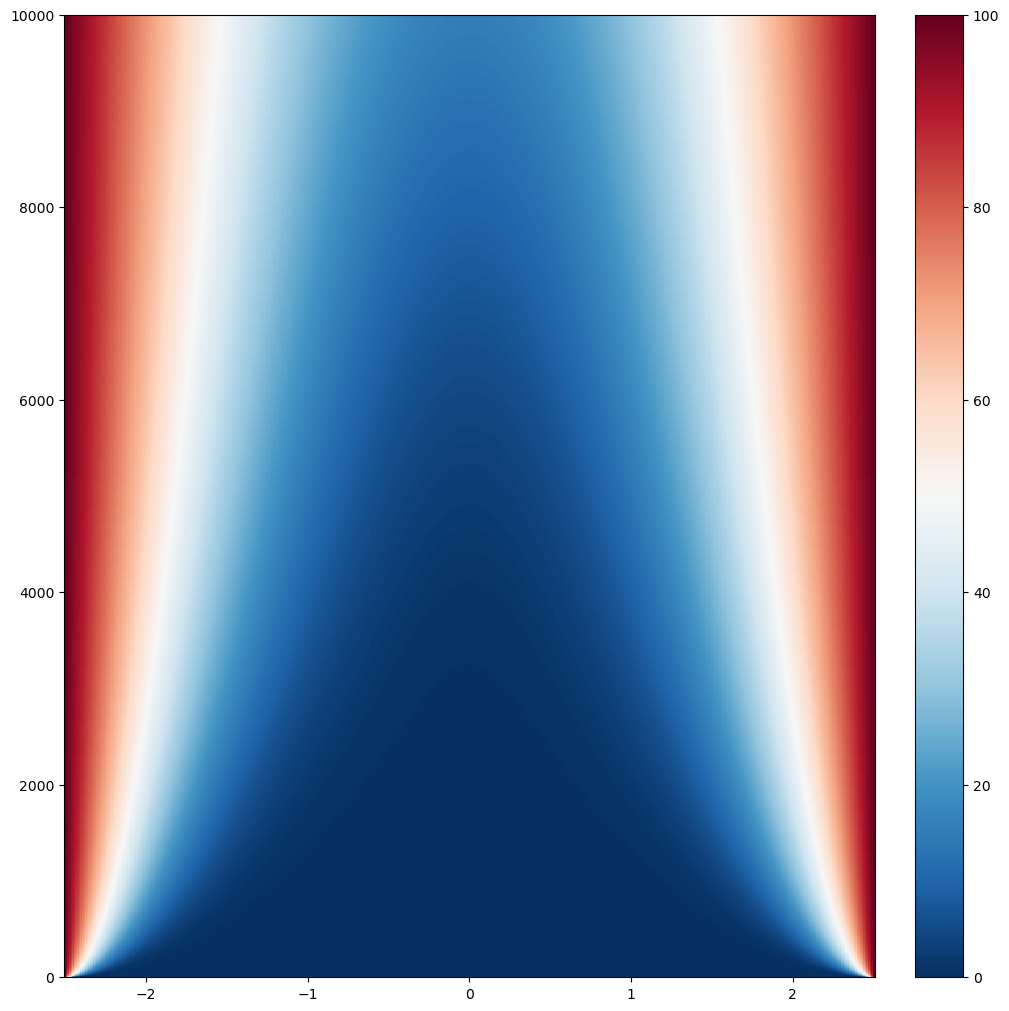

In [81]:
fig, axs = plt.subplots(figsize=(10,10), layout='constrained')
pc = axs.pcolormesh(X, Y, u, cmap='RdBu_r')
fig.colorbar(pc, ax=axs)

## Playground

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 50
max_iter_time = 750

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 100.0
u_left = 0.0
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
    for k in range(0, max_iter_time-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]

    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")